# 심부전증 분류
----------

## 데이터 칼럼
    
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

---

## 1.데이터 및 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Kaggle API


In [2]:
import os

In [59]:
#Kaggle API Username, Key 세팅

In [8]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip '*zip'

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 9.27MB/s]
Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [9]:
!ls

heart-failure-clinical-data.zip		    sample_data
heart_failure_clinical_records_dataset.csv


### 1.3 데이터 로드


In [10]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')   

##  2.EDA


In [11]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


creatinine phosphokinase의 아웃라이어가 매우 큼

### 수치형 데이터 시각화

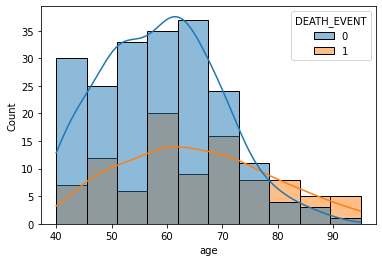

In [15]:
# 나이와 사망여부
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

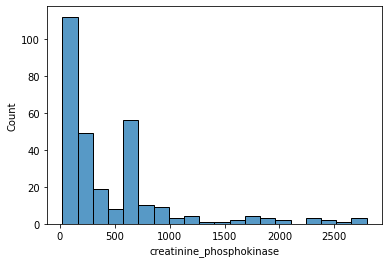

In [16]:
# 크레아틴키나제 검사 결과
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

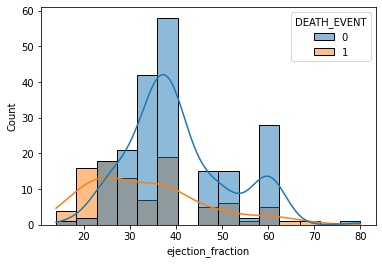

In [18]:
# 박출계수와 생존여부
sns.histplot(data=df, x=df['ejection_fraction'], hue='DEATH_EVENT', kde=True)

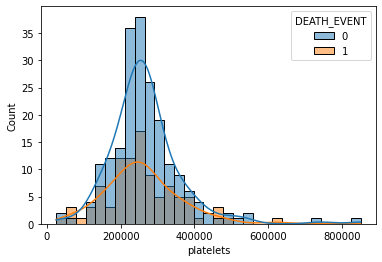

In [20]:
# 혈소판 수와 생존여부
sns.histplot(data=df, x=df['platelets'], hue='DEATH_EVENT', kde=True)

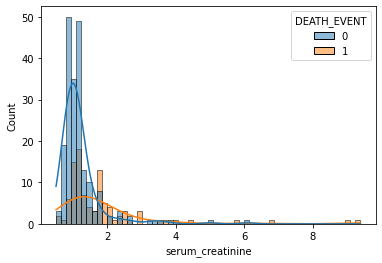

In [22]:
# 혈중 크레아틴 레벨
sns.histplot(data=df, x=df['serum_creatinine'], hue='DEATH_EVENT', kde=True)

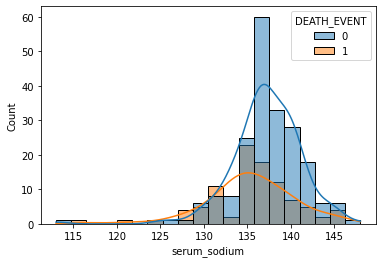

In [23]:
# 혈중 나트륨 레벨
sns.histplot(data=df, x=df['serum_sodium'], hue='DEATH_EVENT', kde=True)

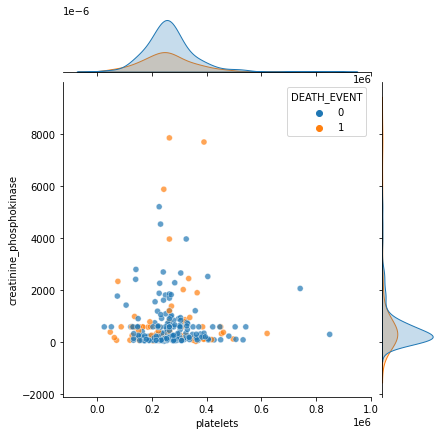

In [26]:
# 크레아틴키나제 검사결과와 혈소판 수
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.7)

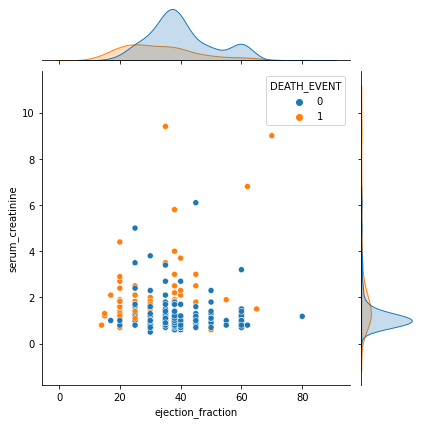

In [25]:
# 박출계수와 혈중 크레아틴
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT')

### 범주형 데이터 시각화


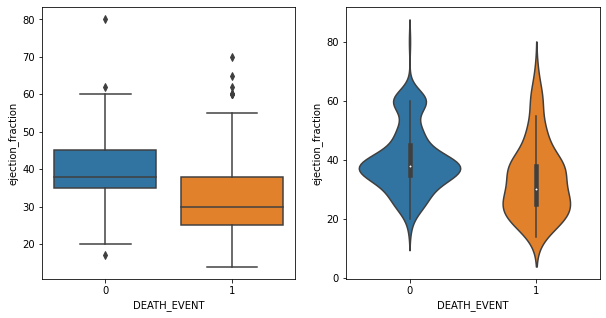

In [32]:
# 박출계수에 따른 생존여부
fig, axes = plt.subplots(1,2, figsize=(10,5), squeeze=False)
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction',data=df, ax=axes[0][0])
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df, ax=axes[0][1])

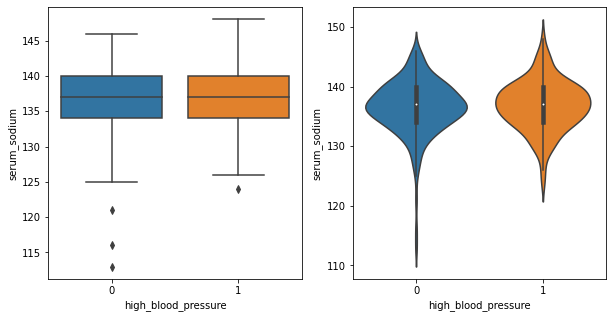

In [35]:
# 혈중 나트륨 농도에 따른 고혈압 여부
fig, axes = plt.subplots(1, 2, figsize=(10,5), squeeze=False)
sns.boxplot(x='high_blood_pressure', y='serum_sodium', data=df, ax=axes[0][0])
sns.violinplot(x='high_blood_pressure', y='serum_sodium', data=df, ax=axes[0][1])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


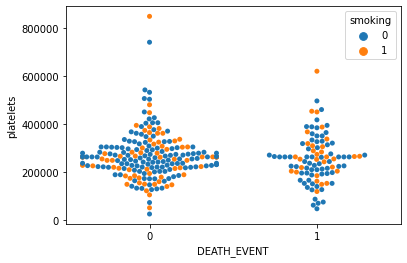

In [37]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)

##  3. 데이터 전처리


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [41]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [42]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)

In [43]:
X.head()

,age,creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


### 학습데이터와 테스트데이터 분리


In [44]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((239, 10), (60, 10))



##  4.Classification 모델 학습



### Logistic Regression 모델 생성/학습


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# LogisticRegression 모델 생성/학습
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 모델 학습 결과 평가


In [48]:
from sklearn.metrics import classification_report

In [49]:
pred = lr.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        46
           1       0.60      0.21      0.32        14

    accuracy                           0.78        60
   macro avg       0.70      0.59      0.59        60
weighted avg       0.75      0.78      0.74        60



### XGBoost






In [50]:
from xgboost import XGBClassifier

In [51]:
# XGBClassifier 모델 생성/학습
xgb = XGBClassifier()
xgb.fit(X_train, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 모델 학습 결과 평가


In [52]:
pred = xgb.predict(X_test) 

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        46
           1       0.45      0.36      0.40        14

    accuracy                           0.75        60
   macro avg       0.64      0.61      0.62        60
weighted avg       0.73      0.75      0.74        60



### feature importanace


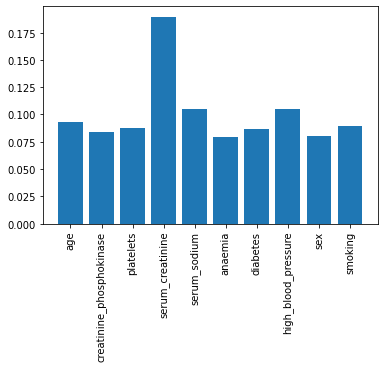

In [54]:
plt.bar(X.columns, xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

#  5.모델 학습 결과 분석


### Precision-Recall 커브

In [55]:
from sklearn.metrics import plot_precision_recall_curve

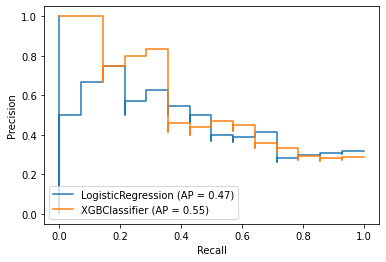

In [56]:
fig = plt.figure()
ax = fig.gca()

plot_precision_recall_curve(lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(xgb, X_test, y_test, ax=ax)

### ROC 커브

In [57]:
from sklearn.metrics import plot_roc_curve

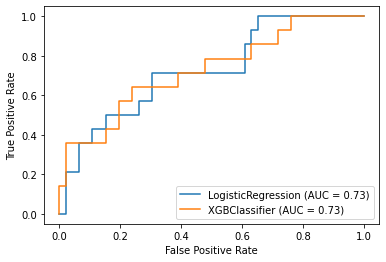

In [58]:
fig = plt.figure()
ax = plt.gca()

plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(xgb, X_test, y_test, ax=ax)